<a href="https://colab.research.google.com/github/upto-master/upto_image/blob/upto_color_jisu/%5B%EC%97%85%ED%88%AC%5D2D3D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
train_2D_dir = '/content/drive/MyDrive/업투/2d3d_images/2D'
train_3D_dir = '/content/drive/MyDrive/업투/2d3d_images/3D'

In [3]:
train_2D_fnames = os.listdir( train_2D_dir )
train_3D_fnames = os.listdir( train_3D_dir )

print(train_2D_fnames[:5])
print(train_3D_fnames[:5])

['33.png', '39.png', '35.png', '37.png', '41.png']
['34.png', '38.png', '40.png', '36.png', '42.png']


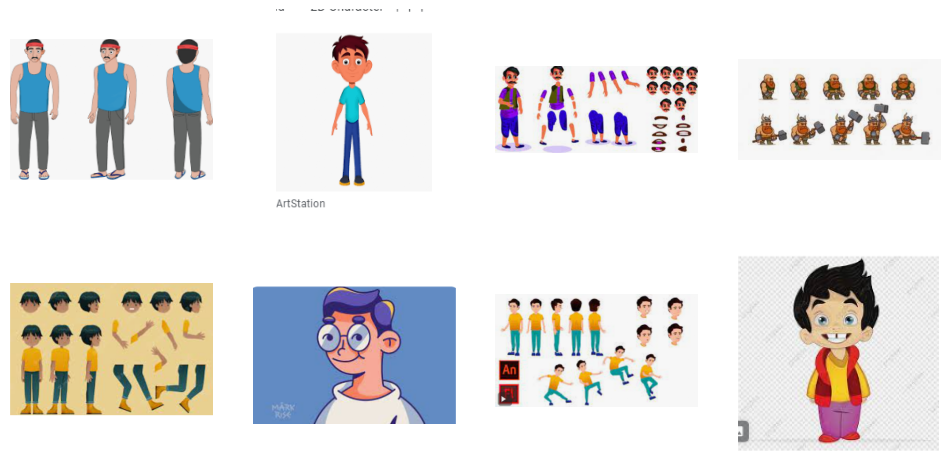

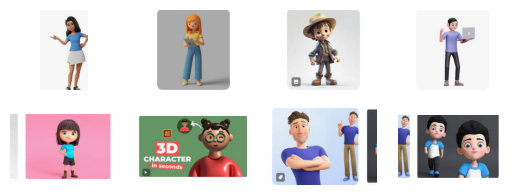

In [4]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_2D_pix = [os.path.join(train_2D_dir, fname)
                for fname in train_2D_fnames[ pic_index-8:pic_index]]

next_3D_pix = [os.path.join(train_3D_dir, fname)
                for fname in train_3D_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_2D_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

for i, img_path in enumerate(next_3D_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
train_dir = '/content/drive/MyDrive/업투/2d3d_images'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

Found 697 images belonging to 2 classes.


In [7]:
# 훈련에 사용되는 고양이/개 이미지 경로
train_2D_dir = os.path.join(train_dir, '2D')
train_3D_dir = os.path.join(train_dir, '3D')
print(train_2D_dir)
print(train_3D_dir)

/content/drive/MyDrive/업투/2d3d_images/2D
/content/drive/MyDrive/업투/2d3d_images/3D


In [8]:
train_2D_fnames = os.listdir( train_2D_dir )
train_3D_fnames = os.listdir( train_3D_dir )

print(train_2D_fnames[:5])
print(train_3D_fnames[:5])

['33.png', '39.png', '35.png', '37.png', '41.png']
['34.png', '38.png', '40.png', '36.png', '42.png']


In [46]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [47]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [53]:
history = model.fit(train_generator,
                    #validation_data=validation_generator,
                    steps_per_epoch=10,
                    epochs=20,
                    validation_steps=50,
                    verbose=2)

Epoch 1/20
10/10 - 1s - loss: 0.3903 - accuracy: 0.8300 - 750ms/epoch - 75ms/step
Epoch 2/20
10/10 - 1s - loss: 0.4465 - accuracy: 0.7950 - 768ms/epoch - 77ms/step
Epoch 3/20
10/10 - 1s - loss: 0.3510 - accuracy: 0.8500 - 754ms/epoch - 75ms/step
Epoch 4/20
10/10 - 1s - loss: 0.2680 - accuracy: 0.8985 - 742ms/epoch - 74ms/step
Epoch 5/20
10/10 - 1s - loss: 0.4059 - accuracy: 0.8450 - 735ms/epoch - 74ms/step
Epoch 6/20
10/10 - 1s - loss: 0.2262 - accuracy: 0.8850 - 718ms/epoch - 72ms/step
Epoch 7/20
10/10 - 1s - loss: 0.2590 - accuracy: 0.9036 - 715ms/epoch - 71ms/step
Epoch 8/20
10/10 - 1s - loss: 0.2985 - accuracy: 0.8650 - 762ms/epoch - 76ms/step
Epoch 9/20
10/10 - 1s - loss: 0.3681 - accuracy: 0.8400 - 1s/epoch - 102ms/step
Epoch 10/20
10/10 - 1s - loss: 0.1662 - accuracy: 0.9550 - 954ms/epoch - 95ms/step
Epoch 11/20
10/10 - 1s - loss: 0.1812 - accuracy: 0.9450 - 909ms/epoch - 91ms/step
Epoch 12/20
10/10 - 1s - loss: 0.4844 - accuracy: 0.8528 - 726ms/epoch - 73ms/step
Epoch 13/20
10/

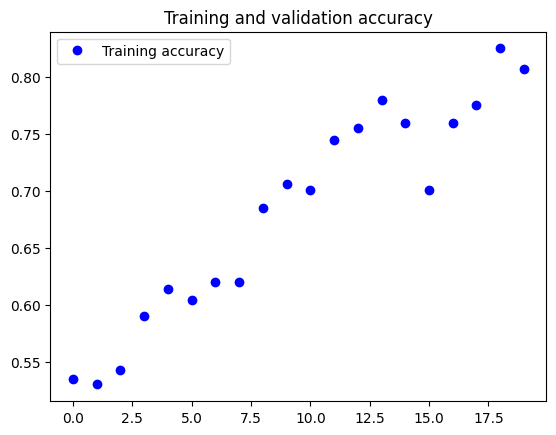

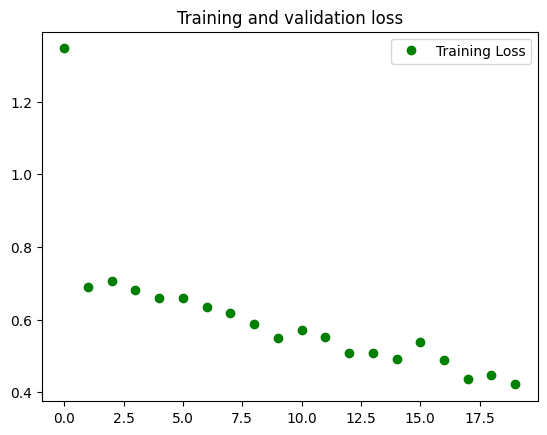

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
#plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [70]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

#uploaded=files.upload()



path = '/content/2d1.png'
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x = x / 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(x)

print(classes[0])

if classes[0]<0.5:
  print(fn + " is a 2D")
else:
  print(fn + " is a 3D")

1/1 [==============================] - 0s 36ms/step
[0.09543528]
-DD-pooh-face-or-head-winnie-the-pooh-37016312-200-200 (1).jpg is a 2D
